In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('wine_data.csv', header = None, usecols = [0,1,2])
df.columns = ['Class label', 'Alchohol', 'Malik acid']

In [17]:
df.describe()

,Class label,Alchohol,Malik acid
count,181.000000,181.00000,181.000000
mean,1.939227,13.51442,2.629116
std,0.775785,4.06732,2.572718
min,1.000000,11.03000,0.740000
25%,1.000000,12.37000,1.610000
50%,2.000000,13.05000,1.870000
75%,3.000000,13.71000,3.170000
max,3.000000,47.00000,25.000000


In [15]:
new_data = pd.DataFrame({'Class label' : [1, 2, 3], 'Alchohol' : [45, 40, 47], 'Malik acid' : [25, 20, 15]})
df = pd.concat([df, new_data], ignore_index = True)

In [16]:
df.shape

(181, 3)

<Axes: xlabel='Alchohol', ylabel='Density'>

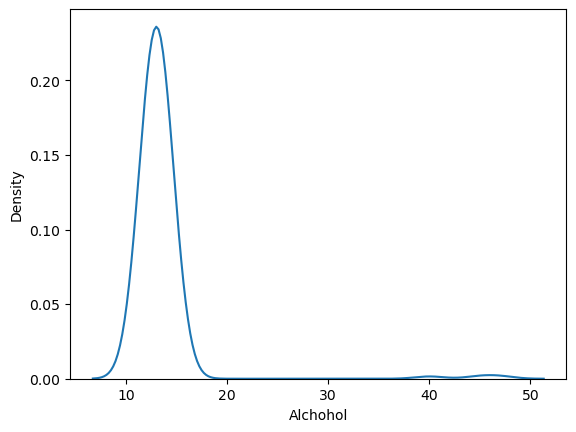

In [19]:
sns.kdeplot(df['Alchohol'])

<Axes: xlabel='Malik acid', ylabel='Density'>

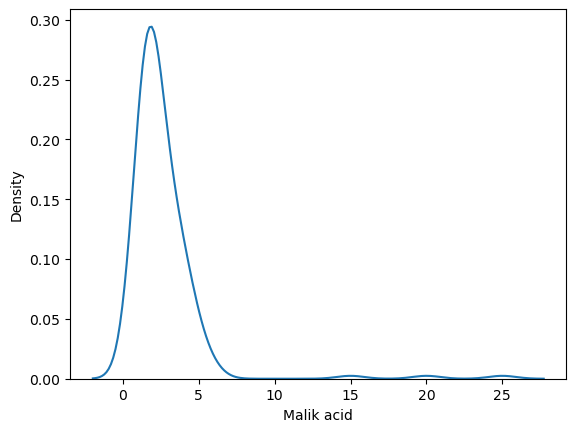

In [20]:
sns.kdeplot(df['Malik acid'])

<Axes: xlabel='Class label', ylabel='Density'>

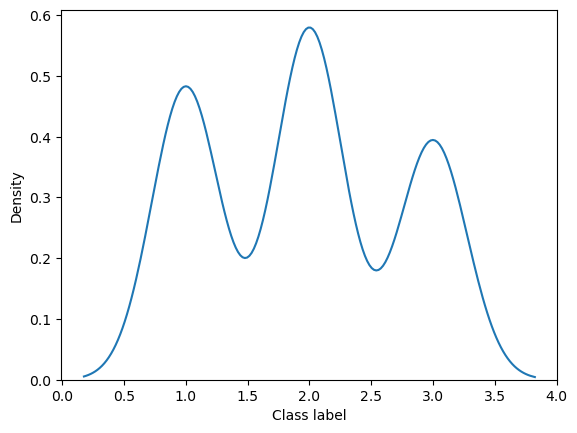

In [21]:
sns.kdeplot(df['Class label'])

<Axes: xlabel='Alchohol', ylabel='Malik acid'>

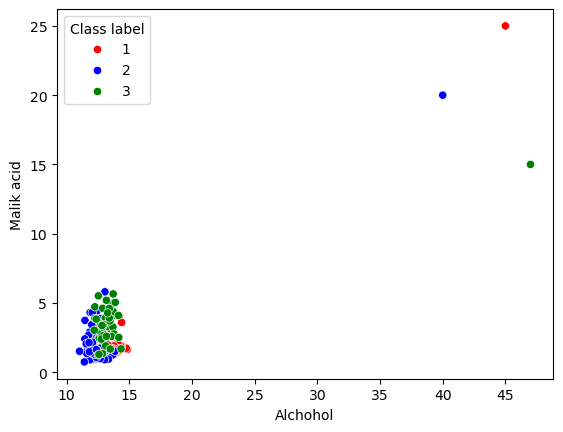

In [26]:
color_dict = {1 : 'red', 3 : 'green', 2 : 'blue'}
sns.scatterplot(x = df['Alchohol'], y = df['Malik acid'], hue = df['Class label'], palette = color_dict)

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df.drop('Class label', axis = 1), df['Class label'], test_size = 0.3, random_state = 0)
X_train.shape, X_test.shape

((126, 2), (55, 2))

In [29]:
from sklearn.preprocessing import RobustScaler
scaler =RobustScaler()

#fit the train data set
scaler.fit(X_train)

#transform the train and tesr data set
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [30]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)

In [31]:
X_train_scaled

,Alchohol,Malik acid
0,0.390244,-0.109541
1,-1.223265,-0.795053
2,0.502814,-0.003534
3,-0.240150,-0.081272
4,-0.427767,-0.243816
...,...,...
121,-0.915572,-0.102473
122,-0.502814,-0.491166
123,-0.465291,-0.180212
124,0.645403,-0.130742


In [32]:
np.round(X_train_scaled.describe(), 1)

,Alchohol,Malik acid
count,126.0,126.0
mean,0.3,0.5
std,3.0,1.6
min,-1.5,-0.8
25%,-0.5,-0.2
50%,0.0,-0.0
75%,0.5,0.8
max,25.5,12.8


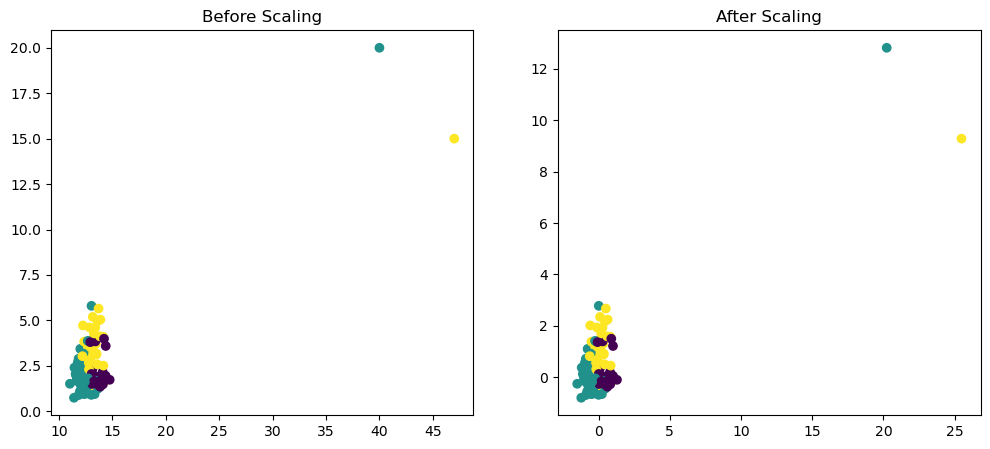

In [35]:
fig,  (ax1, ax2) = plt.subplots(ncols = 2, figsize = (12, 5))


ax1.set_title('Before Scaling')
ax1.scatter(X_train['Alchohol'], X_train['Malik acid'], c = Y_train)

ax2.set_title('After Scaling')
ax2.scatter(X_train_scaled['Alchohol'], X_train_scaled['Malik acid'], c =Y_train)
plt.show()

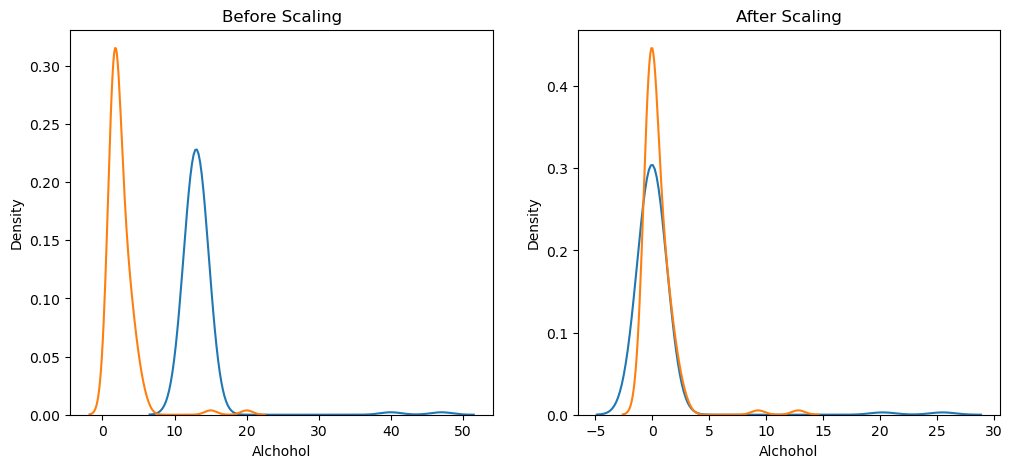

In [37]:
fig,  (ax1, ax2) = plt.subplots(ncols = 2, figsize = (12, 5))

# Before Scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Alchohol'], ax = ax1)
sns.kdeplot(X_train['Malik acid'], ax = ax1)

# After Scaling
ax2.set_title('After Scaling')
sns.kdeplot(X_train_scaled['Alchohol'], ax = ax2)
sns.kdeplot(X_train_scaled['Malik acid'], ax = ax2)
plt.show()


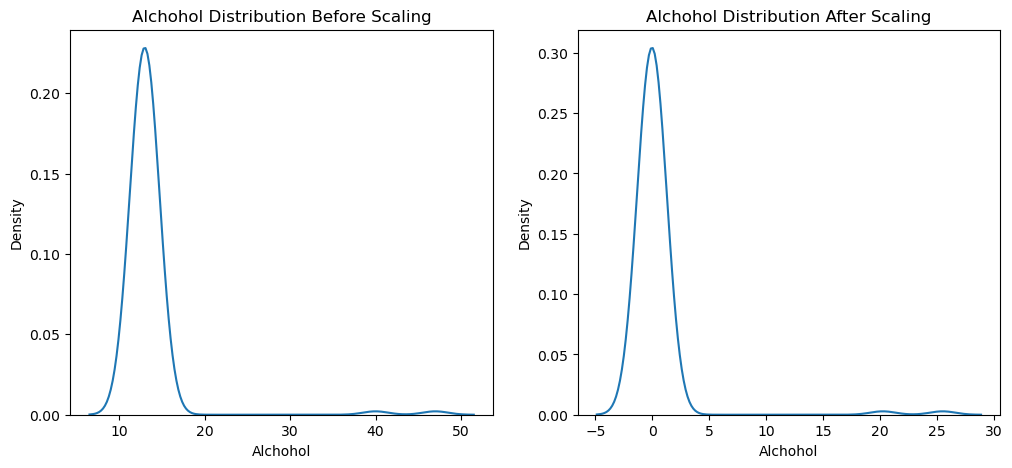

In [39]:
fig,  (ax1, ax2) = plt.subplots(ncols = 2, figsize = (12, 5))

# Before Scaling

ax1.set_title('Alchohol Distribution Before Scaling')
sns.kdeplot(X_train['Alchohol'], ax = ax1)

# after Scaling

ax2.set_title('Alchohol Distribution After Scaling')
sns.kdeplot(X_train_scaled['Alchohol'], ax = ax2)
plt.show()

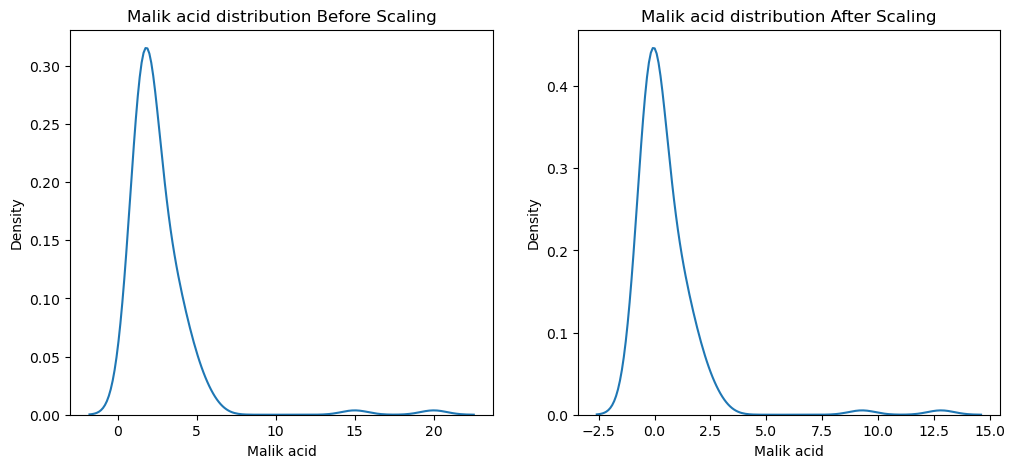

In [41]:
fig,  (ax1, ax2) = plt.subplots(ncols = 2, figsize = (12, 5))

# Before Scaling
ax1.set_title('Malik acid distribution Before Scaling')
sns.kdeplot(X_train['Malik acid'], ax = ax1)

# after Scaling

ax2.set_title('Malik acid distribution After Scaling')
sns.kdeplot(X_train_scaled['Malik acid'], ax = ax2)
plt.show()

In [57]:
from sklearn.linear_model import LogisticRegression

In [61]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [62]:
lr.fit(X_train, Y_train)
lr_scaled.fit(X_train_scaled, Y_train)

LogisticRegression()

In [63]:
Y_pred = lr.predict(X_test)
Y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [64]:
from sklearn.metrics import accuracy_score

In [65]:
print('Actual', accuracy_score(Y_test, Y_pred))
print('Scaled', accuracy_score(Y_test, Y_pred_scaled))

Actual 0.6181818181818182
Scaled 0.6181818181818182


In [71]:
from sklearn.preprocessing import MaxAbsScaler
scaler = MaxAbsScaling()

# fit the train data set
scaler.fit(X_train)

# transform the train and test data set
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.tranform(X_test)

NameError: name 'MaxAbsScaling' is not defined